2017111930 김민서
2023112381 김민혁
2019110415 황재영

1. 주제 - Ford car price prediction

2. 데이터 출처: https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

3. 목표 : 가격에 유의미한 변수를 찾아서 선형회귀, 다항회귀 등을 이용하여 가격 예측의 정확도를 높이는 것

4. feature 설명

    1. year : 생산 연도
    2. mileage : 주행거리(마일 수)
    3. mpg : 연비(mi/gal)

Part 1 : 데이터 전처리
<pre>
-필요 라이브러리 선언
-결측치 확인
-차종별 데이터 분류
-다시 연료 종류별로 데이터 분류
</pre>

In [1]:
#필요한 라이브러리 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("./ford.csv")

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [4]:
df = df.drop(['transmission', 'tax', 'engineSize'], axis = 1)

In [5]:
#결측치 확인
df.isnull().sum()

model       0
year        0
price       0
mileage     0
fuelType    0
mpg         0
dtype: int64

In [6]:
#차종별 데이터 분류(model)
fi_df = df[df['model'] == ' Fiesta']
fo_df = df[(df['model'] == ' Focus')|(df['model'] == 'Focus')]
ku_df = df[df['model'] == ' Kuga']

In [7]:
print("Fiesta Dataset:")
fi_df

Fiesta Dataset:


,model,year,price,mileage,fuelType,mpg
0,Fiesta,2017,12000,15944,Petrol,57.7
3,Fiesta,2019,17500,10460,Petrol,40.3
4,Fiesta,2019,16500,1482,Petrol,48.7
5,Fiesta,2015,10500,35432,Petrol,47.9
7,Fiesta,2017,9000,13054,Petrol,54.3
...,...,...,...,...,...,...
17945,Fiesta,2019,15999,2813,Petrol,58.9
17946,Fiesta,2015,8999,24546,Petrol,65.7
17952,Fiesta,2017,9899,16303,Petrol,57.7
17955,Fiesta,2018,12500,7047,Petrol,48.7


In [8]:
print("Focus Dataset:")
fo_df

Focus Dataset:


,model,year,price,mileage,fuelType,mpg
1,Focus,2018,14000,9083,Petrol,57.7
2,Focus,2017,13000,12456,Petrol,57.7
9,Focus,2018,10000,48141,Petrol,61.4
25,Focus,2017,18499,13063,Petrol,41.5
32,Focus,2019,18990,8400,Petrol,60.1
...,...,...,...,...,...,...
17933,Focus,2017,11000,17339,Petrol,60.1
17942,Focus,2015,8000,65000,Diesel,74.3
17954,Focus,2016,16000,19834,Petrol,41.5
17963,Focus,2015,9999,7010,Diesel,67.3


In [9]:
print("Kuga Dataset:")
ku_df

Kuga Dataset:


,model,year,price,mileage,fuelType,mpg
8,Kuga,2019,25500,6894,Diesel,42.2
13,Kuga,2018,17999,9002,Diesel,54.3
14,Kuga,2018,18999,8970,Diesel,58.9
15,Kuga,2018,14399,12810,Diesel,64.2
16,Kuga,2019,17999,10428,Diesel,38.2
...,...,...,...,...,...,...
17937,Kuga,2018,17999,9725,Petrol,38.2
17947,Kuga,2018,17199,26000,Diesel,54.3
17948,Kuga,2017,16500,27367,Diesel,54.3
17949,Kuga,2018,16500,33646,Diesel,60.1


In [10]:
#차종별 데이터 분류 후, 연료 별 데이터 분류
Pfi_df = fi_df[fi_df['fuelType'] == 'Petrol']
Dfi_df = fi_df[fi_df['fuelType'] == 'Diesel']
Pfo_df = fo_df[fo_df['fuelType'] == 'Petrol']
Dfo_df = fo_df[fo_df['fuelType'] == 'Diesel']
Pku_df = ku_df[ku_df['fuelType'] == 'Petrol']
Dku_df = ku_df[ku_df['fuelType'] == 'Diesel']


In [11]:
print("Fiesta_petrol \n",Pfi_df)
print("Fiesta_Diesel \n",Dfi_df)
print("Focus_petrol \n",Pfo_df)
print("Focus_Diesel \n",Dfo_df)
print("Kuga_petrol \n",Pku_df)
print("Kuga_Diesel \n",Dku_df)

Fiesta_petrol 
          model  year  price  mileage fuelType   mpg
0       Fiesta  2017  12000    15944   Petrol  57.7
3       Fiesta  2019  17500    10460   Petrol  40.3
4       Fiesta  2019  16500     1482   Petrol  48.7
5       Fiesta  2015  10500    35432   Petrol  47.9
7       Fiesta  2017   9000    13054   Petrol  54.3
...        ...   ...    ...      ...      ...   ...
17945   Fiesta  2019  15999     2813   Petrol  58.9
17946   Fiesta  2015   8999    24546   Petrol  65.7
17952   Fiesta  2017   9899    16303   Petrol  57.7
17955   Fiesta  2018  12500     7047   Petrol  48.7
17960   Fiesta  2016   7999    31348   Petrol  54.3

[6164 rows x 6 columns]
Fiesta_Diesel 
          model  year  price  mileage fuelType   mpg
30      Fiesta  2016   7999    60730   Diesel  78.5
65      Fiesta  2013   5998    44304   Diesel  76.4
78      Fiesta  2015   6990    29851   Diesel  76.4
272     Fiesta  2017   9995    27000   Diesel  78.5
361     Fiesta  2015   5998    55898   Diesel  78.5
...    

Part 2 : lasso 회귀분석
<pre>
-산점도로 연관성 확인
-lasso를 이용해서 선형, 다항회귀분석
-중간에 제일 연관성 없어보이는 mpg 제거해서 예측하고 결과 비교
</pre>

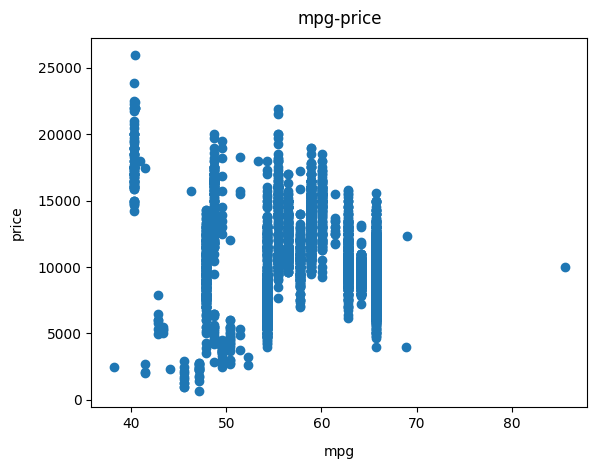

상관계수: -0.17027560509060596
p-value: 2.538616347894435e-41


In [12]:
plt.title("mpg-price",pad=10)
plt.xlabel("mpg",labelpad=10)
plt.ylabel("price",labelpad=10)
plt.scatter(Pfi_df["mpg"], Pfi_df["price"],label='training points')
plt.show()
correlation, p_value = pearsonr(Pfi_df["mpg"].values, Pfi_df["price"].values)
print("상관계수:", correlation)
print("p-value:", p_value)#둘이 mpg와 price는 서로 거의 상관 없음을 알 수 있다.

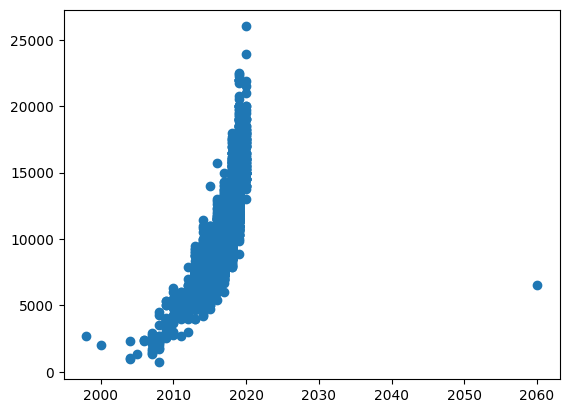

In [13]:
plt.scatter(Pfi_df["year"], Pfi_df["price"],label='training points')
plt.show()

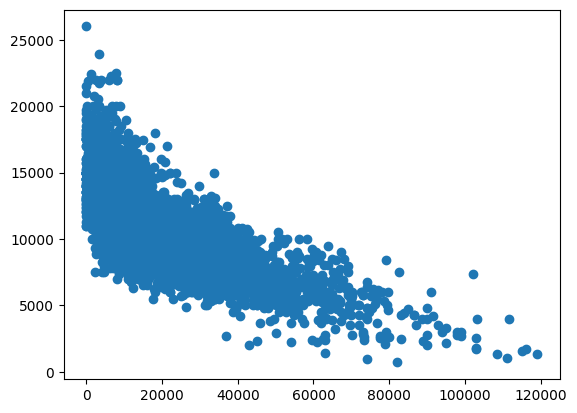

In [14]:
plt.scatter(Pfi_df["mileage"], Pfi_df["price"],label='training points')
plt.show()

2. 비선형 회귀 분석(라쏘로 mpg 변수 지웠을 때와 그냥 비선형 했을 때를 비교하여 예측하려는 값과 관계가 없는(상관계수 0에 가까운) 변수는 지우는 것이 더 정확함을 보이기(r2값 더 낮을 것임))

3. 라쏘 회귀 분석

In [15]:
#training set, data set 분리
from sklearn.model_selection import train_test_split

#Pfi_df = fi_df[fi_df['fuelType'] == 'Petrol']
#Dfi_df = fi_df[fi_df['fuelType'] == 'Diesel']
#Pfo_df = fo_df[fo_df['fuelType'] == 'Petrol']
#Dfo_df = fo_df[fo_df['fuelType'] == 'Diesel']
#Pku_df = ku_df[ku_df['fuelType'] == 'Petrol']
#Dku_df = ku_df[ku_df['fuelType'] == 'Diesel']

#휘발유 사용하는 Fiesta 가격(fiesta_petrol) 
Xfp_train, Xfp_test, yfp_train, yfp_test = train_test_split(
    Pfi_df.drop(['price'],axis=1), Pfi_df['price'].to_numpy(), test_size=0.2, random_state=1)#train과 test 데이터 분할한 것(랜덤으로)
#print("Pfi_df \n",Pfi_df)
#print("Xfp_train \n",Xfp_train)
#print("yfp_train \n",yfp_train )
#print(len(yfp_train))

#디젤 사용하는 Fiesta 가격(fiesta_diesel)
Xfd_train, Xfd_test, yfd_train, tfd_test = train_test_split(
    Dfi_df.drop(['price'],axis=1), Dfi_df['price'].to_numpy(), test_size=0.2, random_state=1)

print("Xfd_train : \n", Xfd_train)
print("yfd_train : \n", yfd_train)
type(yfd_train)

Xfd_train : 
          model  year  mileage fuelType   mpg
17565   Fiesta  2018    43826   Diesel  58.9
9221    Fiesta  2019     8572   Diesel  58.9
6766    Fiesta  2017    55535   Diesel  78.5
14971   Fiesta  2016    16060   Diesel  78.5
16607   Fiesta  2014    37812   Diesel  76.4
...        ...   ...      ...      ...   ...
9623    Fiesta  2017    13632   Diesel  88.3
13981   Fiesta  2010    91000   Diesel  68.9
3645    Fiesta  2015    41758   Diesel  88.3
12873   Fiesta  2017    26391   Diesel  88.3
2060    Fiesta  2019    11086   Diesel  55.4

[314 rows x 5 columns]
yfd_train : 
 [ 9300 12700  8600  8299  7299  5207  9899 11188  4431  5391  3999  9498
  4995 10780  6485  6995  6000  6750 10999  7650  3200  9947  7010  9440
  9300  9241  3990  3495  5500  7290  5640  7490  8449  7999 10798  8998
  6490  8295  5591  7599  5500  8299  9798  9998  4350  7791  7750 10399
  9000  9000  7550  5994  3995  9998  8000 11060 10700  6698 10799  8220
  8498  7480  7410  6690  9795  6495 11500 

numpy.ndarray

In [16]:
# 각 변수를 일차식, 이차식 or 3차식으로 바꿔 해보고, r2계산해서 어떤 것이 더 잘 맞는지 볼 것
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

1. Fiesta-petrolleum 회귀

1-2. lasso 회귀

1-2-1. 2차 다항회귀 응용

In [17]:
#데이터 프레임에서 변수로 쓸 열을 한 개씩 꺼내 각각의 numpy
#변수별로 2차 다항회귀 응용
#mpg 변수 사용했을 때
Xfpt_year=Xfp_train[['year']].values; Xfpt_mileage=Xfp_train[['mileage']].values ; Xfpt_mpg=Xfp_train[['mpg']].values

# 1 위의 산점도를 보면, year, mileage 모두, 다항식 곡선 형태와 비슷하므로, year, mileage는 다항식으로 바꿀 것
# 2 mpg는 애초에 산점도 보면, price와 거의 관계가 없다는 것을 알 수 있으니, 그냥 lasso회귀시 사라질 것 - 딱히 작업 따로 x
# 3 다항식의 형태로 전환한 year, mileage와 mpg 행렬들을 하나로 합칠 것.
#  이후, linearRegression.fit으로 계산
#
lasso = Lasso(alpha=300.0)#alpha는 정규화의 강도를 조절하는 하이퍼파라미터로, 교수님 강의 노트의 ridge, lasso의 lambda부분
quadratic = PolynomialFeatures(degree=2)
Xfpt_year_quad = quadratic.fit_transform(Xfpt_year)
Xfpt_mileage_quad = quadratic.fit_transform(Xfpt_mileage)
#print("Xfpt_year_quad \n", Xfpt_year_quad)
#print("Xfpt_mileage_quad \n", Xfpt_mileage_quad)

#다시 training set 한개의 행렬로 합치기(즉, Xfpt는 전체 training set이 된다.)
Xfpt=np.concatenate((Xfpt_year_quad,Xfpt_mileage_quad,Xfpt_mpg),axis=1)#열로서 행렬 합치기.(즉, 7열이 된다.)
#1열: 상수 , 2열 : year 1차 , 3열 : year 2차(제곱) , 4열 : 상수 , 5열 : mileage 1차, 6열 : mileage 2차, 7열 : mpg -> 실제 다항식에서는 상수항은 하나이니, 4열은 빼서 6열로 만드는 것이 맞다!
Xfpt=np.delete(Xfpt,3,axis=1)#index=3인 열(상수) 제거

#print("Xfpt : \n",Xfpt)
#print("Xfpt[0:9,:] : \n", Xfpt[0:9,:])
#print(Xfpt.shape)
#regr, 즉, linearRegression하면, 이 Xfpt 각 열의 coeff가 결정될 것

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
lasso=lasso.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", lasso.coef_)
print("quad+linear constant \n: ", lasso.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest_year=Xfp_test[['year']].values; Xfptest_mileage=Xfp_test[['mileage']].values ; Xfptest_mpg=Xfp_test[['mpg']].values
Xfptest_year_quad = quadratic.fit_transform(Xfptest_year)
Xfptest_mileage_quad = quadratic.fit_transform(Xfptest_mileage)
Xfptest=np.concatenate((Xfptest_year_quad,Xfptest_mileage_quad,Xfptest_mpg),axis=1)
Xfptest=np.delete(Xfptest,3,axis=1)
yfp_predicted=lasso.predict(Xfptest)#test 입력값으로 예측한 값들
fp_r2_with_mpg_quad_lasso=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score quad with mpg lasso \n", fp_r2_with_mpg_quad_lasso)

quad+linear coeff 
:  [ 0.00000000e+00  0.00000000e+00  1.88295663e-01 -1.31149054e-01
  9.99523484e-07 -7.94845319e+01]
quad+linear constant 
:  -748816.322399917
fiesta-petrolleum r2_score quad with mpg lasso 
 0.7218976217667401


In [18]:
#mpg 변수 사용하지 않았을 때
Xfpt_year=Xfp_train[['year']].values; Xfpt_mileage=Xfp_train[['mileage']].values

lasso = Lasso(alpha=300.0)#alpha는 정규화의 강도를 조절하는 하이퍼파라미터로, 교수님 강의 노트의 ridge, lasso의 lambda부분
quadratic = PolynomialFeatures(degree=2)
Xfpt_year_quad = quadratic.fit_transform(Xfpt_year)
Xfpt_mileage_quad = quadratic.fit_transform(Xfpt_mileage)

#다시 training set 한개의 행렬로 합치기(즉, Xfpt는 전체 training set이 된다.)
Xfpt=np.concatenate((Xfpt_year_quad,Xfpt_mileage_quad),axis=1)#열로서 행렬 합치기.
#1열: 상수 , 2열 : year 1차 , 3열 : year 2차(제곱) , 4열 : 상수 , 5열 : mileage 1차, 6열 : mileage 2차 -> 실제 다항식에서는 상수항은 하나이니, 4열은 빼서 6열로 만드는 것이 맞다!
Xfpt=np.delete(Xfpt,3,axis=1)#index=3인 열(상수) 제거

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
lasso=lasso.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", lasso.coef_)
print("quad+linear constant \n: ", lasso.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest_year=Xfp_test[['year']].values; Xfptest_mileage=Xfp_test[['mileage']].values 
Xfptest_year_quad = quadratic.fit_transform(Xfptest_year)
Xfptest_mileage_quad = quadratic.fit_transform(Xfptest_mileage)
Xfptest=np.concatenate((Xfptest_year_quad,Xfptest_mileage_quad),axis=1)
Xfptest=np.delete(Xfptest,3,axis=1)
yfp_predicted=lasso.predict(Xfptest)#test 입력값으로 예측한 값들
fp_r2_without_mpg_quad_lasso=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score quad with mpg lasso \n", fp_r2_with_mpg_quad_lasso)
print("fiesta-petrolleum r2_score quad without mpg lasso \n", fp_r2_without_mpg_quad_lasso)
#질문 : mpg와 price는 위 산점도를 보면, 거의 상관관계가 없어보이지만, 왜 r2는 mpg를 꼈을 때, 더 높게 나오는지?

quad+linear coeff 
:  [ 0.00000000e+00  0.00000000e+00  1.81314473e-01 -1.51340895e-01
  1.28144928e-06]
quad+linear constant 
:  -724944.5991948713
fiesta-petrolleum r2_score quad with mpg lasso 
 0.7218976217667401
fiesta-petrolleum r2_score quad without mpg lasso 
 0.6939703282047018


1-2-2 3차 다항회귀 응용

In [19]:
#변수별로 3차 다항회귀 응용
#mpg 변수 사용했을 때
Xfpt_year=Xfp_train[['year']].values; Xfpt_mileage=Xfp_train[['mileage']].values ; Xfpt_mpg=Xfp_train[['mpg']].values

lasso = Lasso(alpha=300.0)#alpha는 정규화의 강도를 조절하는 하이퍼파라미터로, 교수님 강의 노트의 ridge, lasso의 lambda부분
cubic = PolynomialFeatures(degree=3)
Xfpt_year_cubic = cubic.fit_transform(Xfpt_year)
Xfpt_mileage_cubic = cubic.fit_transform(Xfpt_mileage)
#print("Xfpt_year_quad \n", Xfpt_year_quad)
#print("Xfpt_mileage_quad \n", Xfpt_mileage_quad)

#다시 training set 한개의 행렬로 합치기(즉, Xfpt는 전체 training set이 된다.)
Xfpt=np.concatenate((Xfpt_year_cubic,Xfpt_mileage_cubic,Xfpt_mpg),axis=1)#열로서 행렬 합치기.(즉, 9열이 된다.)
#1열: 상수 , 2열 : year 1차 , 3열 : year 2차(제곱) , 4열 : year 3차(세제곱) , 5열 : 상수, 6열 : mileage 1차, 7열 : mileage 2차, 8열 : mileage 3차 9열 : mpg -> 실제 다항식에서는 상수항은 하나이니, 5열은 빼서 8열로 만드는 것이 맞다!
Xfpt=np.delete(Xfpt,4,axis=1)#index=3인 열(상수) 제거

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
lasso=lasso.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", lasso.coef_)
print("quad+linear constant \n: ", lasso.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest_year=Xfp_test[['year']].values; Xfptest_mileage=Xfp_test[['mileage']].values ; Xfptest_mpg=Xfp_test[['mpg']].values
Xfptest_year_cubic =  cubic.fit_transform(Xfptest_year)
Xfptest_mileage_cubic = cubic.fit_transform(Xfptest_mileage)
Xfptest=np.concatenate((Xfptest_year_cubic,Xfptest_mileage_cubic,Xfptest_mpg),axis=1)
Xfptest=np.delete(Xfptest,4,axis=1)
yfp_predicted=lasso.predict(Xfptest)#test 입력값으로 예측한 값들

#r2 score(결정계수)
fp_r2_with_mpg_cubic_lasso=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score cubic with mpg lasso \n", fp_r2_with_mpg_cubic_lasso)

quad+linear coeff 
:  [ 0.00000000e+00  0.00000000e+00  3.52316372e-01 -5.53239630e-05
 -1.96910427e-01  3.06358589e-06 -1.60240784e-11 -7.41186797e+01]
quad+linear constant 
:  -961987.4400068393
fiesta-petrolleum r2_score cubic with mpg lasso 
 0.7281765691030102


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.147e+09, tolerance: 4.146e+06
  model = cd_fast.enet_coordinate_descent(


In [20]:
#변수별로 3차 다항회귀 응용
#mpg 변수 사용 안 했을 때
Xfpt_year=Xfp_train[['year']].values; Xfpt_mileage=Xfp_train[['mileage']].values

lasso = Lasso(alpha=300.0)#alpha는 정규화의 강도를 조절하는 하이퍼파라미터로, 교수님 강의 노트의 ridge, lasso의 lambda부분
cubic = PolynomialFeatures(degree=3)
Xfpt_year_cubic = cubic.fit_transform(Xfpt_year)
Xfpt_mileage_cubic = cubic.fit_transform(Xfpt_mileage)
#print("Xfpt_year_quad \n", Xfpt_year_quad)
#print("Xfpt_mileage_quad \n", Xfpt_mileage_quad)

#다시 training set 한개의 행렬로 합치기(즉, Xfpt는 전체 training set이 된다.)
Xfpt=np.concatenate((Xfpt_year_cubic,Xfpt_mileage_cubic),axis=1)#열로서 행렬 합치기.(즉, 9열이 된다.)
#1열: 상수 , 2열 : year 1차 , 3열 : year 2차(제곱) , 4열 : year 3차(세제곱) , 5열 : 상수, 6열 : mileage 1차, 7열 : mileage 2차, 8열 : mileage 3차 9열 : mpg -> 실제 다항식에서는 상수항은 하나이니, 5열은 빼서 8열로 만드는 것이 맞다!
Xfpt=np.delete(Xfpt,4,axis=1)#index=3인 열(상수) 제거

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
lasso=lasso.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", lasso.coef_)
print("quad+linear constant \n: ", lasso.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest_year=Xfp_test[['year']].values; Xfptest_mileage=Xfp_test[['mileage']].values 
Xfptest_year_cubic =  cubic.fit_transform(Xfptest_year)
Xfptest_mileage_cubic = cubic.fit_transform(Xfptest_mileage)
Xfptest=np.concatenate((Xfptest_year_cubic,Xfptest_mileage_cubic),axis=1)
Xfptest=np.delete(Xfptest,4,axis=1)
yfp_predicted=lasso.predict(Xfptest)#test 입력값으로 예측한 값들

#r2 score(결정계수)
fp_r2_without_mpg_cubic_lasso=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score cubic without mpg lasso \n", fp_r2_without_mpg_cubic_lasso)

quad+linear coeff 
:  [ 0.00000000e+00  0.00000000e+00  3.20028363e-01 -4.70880759e-05
 -2.36166350e-01  3.97576286e-06 -2.11177940e-11]
quad+linear constant 
:  -902295.4415706466
fiesta-petrolleum r2_score cubic without mpg lasso 
 0.7041888327867796


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.643e+09, tolerance: 4.146e+06
  model = cd_fast.enet_coordinate_descent(


1-2-3 일반 linear regression, lasso

In [21]:
#일반 3차 linear regression을 lasso로
#mpg 변수 사용했을 때
Xfpt = Xfp_train[['year', 'mileage', 'mpg']].values
lasso = Lasso(alpha=300.0)#alpha는 정규화의 강도를 조절하는 하이퍼파라미터로, 교수님 강의 노트의 ridge, lasso의 lambda부분

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
lasso=lasso.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", lasso.coef_)
print("quad+linear constant \n: ", lasso.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest= Xfp_test[['year', 'mileage', 'mpg']]
yfp_predicted=lasso.predict(Xfptest)#test 입력값으로 예측한 값들

#r2 score(결정계수)
fp_r2_with_mpg_linear_lasso=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score linear lasso with mpg \n", fp_r2_with_mpg_linear_lasso)

quad+linear coeff 
:  [ 6.37987078e+02 -7.63906133e-02 -9.33216130e+01]
quad+linear constant 
:  -1269254.4613072847
fiesta-petrolleum r2_score linear lasso with mpg 
 0.6909212236773143


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [22]:
#일반 3차 linear regression을 lasso로
#mpg 변수 사용 안 했을 때
Xfpt = Xfp_train[['year', 'mileage']].values
lasso = Lasso(alpha=300.0)#alpha는 정규화의 강도를 조절하는 하이퍼파라미터로, 교수님 강의 노트의 ridge, lasso의 lambda부분

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
lasso=lasso.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", lasso.coef_)
print("quad+linear constant \n: ", lasso.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest= Xfp_test[['year', 'mileage']]
yfp_predicted=lasso.predict(Xfptest)#test 입력값으로 예측한 값들

#r2 score(결정계수)
fp_r2_without_mpg_linear_lasso=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score linear without mpg lasso\n", fp_r2_without_mpg_linear_lasso)

quad+linear coeff 
:  [ 6.03712931e+02 -7.84862414e-02]
quad+linear constant 
:  -1205670.716870446
fiesta-petrolleum r2_score linear without mpg lasso
 0.6487928347855996


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [23]:
#3차 다항식, 2차 다항식, 선형회귀 lasso 응용시 결정계수 비교
print("fiesta-petrolleum r2_score linear lasso with mpg \n", fp_r2_with_mpg_linear_lasso)
print("fiesta-petrolleum r2_score linear without mpg lasso\n", fp_r2_without_mpg_linear_lasso)
print("fiesta-petrolleum r2_score quad with mpg lasso \n", fp_r2_with_mpg_quad_lasso)
print("fiesta-petrolleum r2_score quad without mpg lasso \n", fp_r2_without_mpg_quad_lasso)
print("fiesta-petrolleum r2_score cubic with mpg lasso \n", fp_r2_with_mpg_cubic_lasso)
print("fiesta-petrolleum r2_score cubic without mpg lasso \n", fp_r2_without_mpg_cubic_lasso)

fiesta-petrolleum r2_score linear lasso with mpg 
 0.6909212236773143
fiesta-petrolleum r2_score linear without mpg lasso
 0.6487928347855996
fiesta-petrolleum r2_score quad with mpg lasso 
 0.7218976217667401
fiesta-petrolleum r2_score quad without mpg lasso 
 0.6939703282047018
fiesta-petrolleum r2_score cubic with mpg lasso 
 0.7281765691030102
fiesta-petrolleum r2_score cubic without mpg lasso 
 0.7041888327867796


3. 결론

1) price와 상관관계가 깊은 year와 mileage의 경우, 각각의 차수가 커질수록, 회귀분석의 정확도가 증가한다.
2) price와 상관관계가 없는(상관계수 0에 가까운) mpg가 변수로 존재할 때, 회귀분석의 정확도가 언제나(1차, 2차, 3차 다항식 모두) 증가했다. 즉, 상관관계가 없어 보이는 변수도 있을 때 더 정확할 수 있는 것을 보면, 상관계수나 산점도가 두 변수 사이의 관계의 유무를 완벽히 보여줄 수는 없는 것을 알 수 있다.

Part 3 : 일반 회귀분석
<pre>
-상관계수를 이용하여 변수들 사이 관계 확인
-선형, 다항 회귀분석을 통해 가격 예측
-상관계수 가장 낮은 변수를 제거하며 정확도 비교
</pre>

1. 사용하고자 하는 변수들 중 의미 없는 변수 가려내기

In [24]:
Pfi_df

,model,year,price,mileage,fuelType,mpg
0,Fiesta,2017,12000,15944,Petrol,57.7
3,Fiesta,2019,17500,10460,Petrol,40.3
4,Fiesta,2019,16500,1482,Petrol,48.7
5,Fiesta,2015,10500,35432,Petrol,47.9
7,Fiesta,2017,9000,13054,Petrol,54.3
...,...,...,...,...,...,...
17945,Fiesta,2019,15999,2813,Petrol,58.9
17946,Fiesta,2015,8999,24546,Petrol,65.7
17952,Fiesta,2017,9899,16303,Petrol,57.7
17955,Fiesta,2018,12500,7047,Petrol,48.7


In [25]:
corr = Pfi_df.drop(columns=['model','fuelType']).corr()
corr.style.background_gradient(cmap='coolwarm')

,year,price,mileage,mpg
year,1.000000,0.757343,-0.665181,0.084535
price,0.757343,1.000000,-0.693577,-0.170276
mileage,-0.665181,-0.693577,1.000000,-0.022207
mpg,0.084535,-0.170276,-0.022207,1.000000


In [26]:
corr = Pfo_df.drop(columns=['model','fuelType']).corr()
corr.style.background_gradient(cmap='coolwarm')

,year,price,mileage,mpg
year,1.000000,0.726537,-0.818401,0.267442
price,0.726537,1.000000,-0.691882,-0.296356
mileage,-0.818401,-0.691882,1.000000,-0.171343
mpg,0.267442,-0.296356,-0.171343,1.000000


In [27]:
corr = Dfi_df.drop(columns=['model','fuelType']).corr()
corr.style.background_gradient(cmap='coolwarm')

,year,price,mileage,mpg
year,1.000000,0.851712,-0.639757,0.124462
price,0.851712,1.000000,-0.796609,0.008927
mileage,-0.639757,-0.796609,1.000000,-0.073681
mpg,0.124462,0.008927,-0.073681,1.000000


이를 통해 price와 year만 관계있는 것을 알 수 있음.

In [28]:
from sklearn.model_selection import train_test_split
#Petrol fiesta train, test 분할
Xfp_train, Xfp_test, yfp_train, yfp_test = train_test_split(
    Pfi_df.drop(['price','model','fuelType'],axis=1), Pfi_df['price'].to_numpy(), test_size=0.2, random_state=1)
#Diesel fiesta train, test 분할
Xfd_train, Xfd_test, yfd_train, yfd_test = train_test_split(
    Dfi_df.drop(['price','model','fuelType'],axis=1), Dfi_df['price'].to_numpy(), test_size=0.2, random_state=1)

In [29]:
#행렬 계산으로 fiesta petrol W값 구하기
x = Xfp_train.to_numpy()
xtx = np.matmul(x.T , x)
xtx_inv = np.linalg.inv(xtx)
W = np.matmul(np.matmul(xtx_inv , x.T), yfp_train)
W

array([  9.0986027 ,  -0.13209053, -88.50236516])

In [30]:
#행렬 계산으로 fiesta diesel W값 구하기
x = Xfd_train.to_numpy()
xtx = np.matmul(x.T , x)
xtx_inv = np.linalg.inv(xtx)
W = np.matmul(np.matmul(xtx_inv , x.T), yfd_train)
W

array([  6.5061772 ,  -0.09396562, -16.00697174])

In [31]:
predicted_yfp_train = np.matmul(Xfp_train.to_numpy(), W)
predicted_yfp_test = np.matmul(Xfp_test.to_numpy(), W)
print(predicted_yfp_train)
print(predicted_yfp_test)

[10273.92707201 11403.49499236 11677.54924994 ... 11126.1934594
 11485.30294498  9161.25766536]
[11434.49464491 11328.70152181 10831.33110506 ... 11159.22919411
 11544.270782   10571.06889894]


In [32]:
predicted_yfd_train = np.matmul(Xfd_train.to_numpy(), W)
predicted_yfd_test = np.matmul(Xfd_test.to_numpy(), W)
print(predicted_yfd_train)
print(predicted_yfd_test)

[ 8068.51787748 11387.68787484  6648.03165856 10350.81816589
  8327.4803768   5175.40379408  9681.21921715  9508.51577486
  7969.33231549  3396.00197709  4187.55637217 10578.61336835
  6847.62899045 10296.15272719  4544.68403098  5828.55878966
  7240.41471708  8028.1059248   9797.67313982  7731.92503705
  5544.70916934  9600.97255164  7257.33641721 10708.34017357
  8115.03085732  8616.94210265  6958.6812065   3486.63824532
  5258.82271122  6611.60470529  6652.52072508  7394.4322507
  8931.58405424 10595.59859511 10828.40287382 10749.89013628
  5810.02374696  9121.74791095  8103.06793651  9567.31031147
  6247.48110687  7577.96425892 10909.18440481  8827.93997999
  6363.8433563   9482.36539476  8839.78341436  8640.67451222
  8077.8838848   8243.94367766  7537.48762821   599.746865
  5107.70284779  7934.38122891  8754.53028432  9657.57040663
 10596.7262121   9263.35536067  9315.53556505 10025.81744686
  9175.51879291  7359.91516402  6817.50053008  7147.67065426
 11475.32724013  6338.27588

In [33]:
#petrol train 데이터의 잔차, MSE
residuals_fp_train = (yfp_train- predicted_yfp_train)
MSE_fp_train = (residuals_fp_train*residuals_fp_train).mean()
print(MSE_fp_train)
#petrol test 데이터의 잔차, MSE
residuals_fp_test = (yfp_test- predicted_yfp_test)
MSE_fp_test = (residuals_fp_test*residuals_fp_test).mean()
print(MSE_fp_test)

4571875.091477589
4092387.124893865


In [34]:
#diesel train 데이터의 잔차, MSE
residuals_fd_train = (yfd_train- predicted_yfd_train)
MSE_fd_train = (residuals_fd_train*residuals_fd_train).mean()
print(MSE_fd_train)

#petrol test 데이터의 잔차, MSE
residuals_fd_test = (yfd_test- predicted_yfd_test)
MSE_fd_test = (residuals_fd_test*residuals_fd_test).mean()
print(MSE_fd_test)

2288110.093396083
1697294.8703603342


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
LR_p = LinearRegression()
LR_p.fit(Xfp_train, yfp_train)

LR_d = LinearRegression()
LR_d.fit(Xfd_train, yfd_train)

LinearRegression()

In [37]:
LR_p.coef_

array([ 7.67440114e+02, -6.50344620e-02, -1.03414551e+02])

In [38]:
LR_d.coef_

array([ 6.66165896e+02, -4.96149828e-02, -2.85218644e+01])

In [39]:
r2_score(LR_p.predict(Xfp_train), yfp_train), r2_score(LR_p.predict(Xfp_test), yfp_test)

(0.5378985563312773, 0.5679512218897406)

In [40]:
r2_score(LR_d.predict(Xfd_train), yfd_train), r2_score(LR_d.predict(Xfd_test), yfd_test)

(0.8213684062272942, 0.8306074401414159)

아까 상관관계로 제일 관계없는 mpg 제거 후 r2 score 구하기

In [41]:
Pfi_df_wompg = Pfi_df.drop(['mpg', 'model', 'fuelType', 'price'], axis = 1)
Dfi_df_wompg = Dfi_df.drop(['mpg', 'model', 'fuelType', 'price'], axis = 1)

In [42]:
Pfi_df_wompg

,year,mileage
0,2017,15944
3,2019,10460
4,2019,1482
5,2015,35432
7,2017,13054
...,...,...
17945,2019,2813
17946,2015,24546
17952,2017,16303
17955,2018,7047


In [43]:
from sklearn.model_selection import train_test_split
Xfp_train_wompg, Xfp_test_wompg, yfp_train_wompg, yfp_test_wompg = train_test_split(Pfi_df_wompg, Pfi_df['price'].to_numpy(), test_size=0.2, random_state=1)
Xfd_train_wompg, Xfd_test_wompg, yfd_train_wompg, yfd_test_wompg = train_test_split(Dfi_df_wompg, Dfi_df['price'].to_numpy(), test_size=0.2, random_state=1)

In [44]:
LR_p_wompg = LinearRegression()
LR_d_wompg = LinearRegression()

LR_p_wompg.fit(Xfp_train_wompg, yfp_train_wompg)
LR_d_wompg.fit(Xfd_train_wompg, yfd_train_wompg)

LinearRegression()

In [45]:
print(LR_p_wompg.coef_)
print(LR_d_wompg.coef_)

[ 7.29459663e+02 -6.73567029e-02]
[ 6.52093749e+02 -4.97729470e-02]


In [46]:
print(r2_score(LR_p_wompg.predict(Xfp_train_wompg), yfp_train_wompg), r2_score(LR_p_wompg.predict(Xfp_test_wompg), yfp_test_wompg))
print(r2_score(LR_d_wompg.predict(Xfd_train_wompg), yfd_train_wompg), r2_score(LR_d_wompg.predict(Xfd_test_wompg), yfd_test_wompg))

0.41836228355460314 0.4667489165711767
0.8079432278212034 0.8227222148801344


In [47]:
print('모두 사용한 fiesta petrol의 train, test r2 score : ',r2_score(LR_p.predict(Xfp_train), yfp_train), r2_score(LR_p.predict(Xfp_test), yfp_test))
print('mpg 제외한 fiesta petrol의 train, test r2 score : ',r2_score(LR_p_wompg.predict(Xfp_train_wompg), yfp_train_wompg), r2_score(LR_p_wompg.predict(Xfp_test_wompg), yfp_test_wompg))
print('모두 사용한 fiesta diesel의 train, test r2 score : ',r2_score(LR_d.predict(Xfd_train), yfd_train), r2_score(LR_d.predict(Xfd_test), yfd_test))
print('mpg 제외한 fiesta diesel의 train, test r2 score : ',r2_score(LR_d_wompg.predict(Xfd_train_wompg), yfd_train_wompg), r2_score(LR_d_wompg.predict(Xfd_test_wompg), yfd_test_wompg))

모두 사용한 fiesta petrol의 train, test r2 score :  0.5378985563312773 0.5679512218897406
mpg 제외한 fiesta petrol의 train, test r2 score :  0.41836228355460314 0.4667489165711767
모두 사용한 fiesta diesel의 train, test r2 score :  0.8213684062272942 0.8306074401414159
mpg 제외한 fiesta diesel의 train, test r2 score :  0.8079432278212034 0.8227222148801344


■ 제일 관계없어 보이는 mpg를 제거했음에도 r2 score가 낮아진 것을 보아 변수가 많을수록 정확도가 높다는 것을 알 수 있다.

2차, 3차 다항회귀 이용
Petrolleum, diesel 모두 결과가 비슷하게 나오므로 Petrolleum만 선택

In [48]:
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

In [49]:
# 다항변수 생성
Xfpt_year=Xfp_train[['year']].values; Xfpt_mileage=Xfp_train[['mileage']].values ; Xfpt_mpg=Xfp_train[['mpg']].values

# 다항식의 형태로 전환한 year, mileage와 mpg 행렬들을 하나로 합칠 것.
# 이후, linearRegression.fit으로 계산

quadratic = PolynomialFeatures(degree=2)
Xfpt_year_quad = quadratic.fit_transform(Xfpt_year)
Xfpt_mileage_quad = quadratic.fit_transform(Xfpt_mileage)

#다시 training set 한개의 행렬로 합치기(즉, Xfpt는 전체 training set이 된다.)
Xfpt=np.concatenate((Xfpt_year_quad,Xfpt_mileage_quad,Xfpt_mpg),axis=1)#열로서 행렬 합치기.(즉, 7열이 된다.)
#1열: 상수 , 2열 : year 1차 , 3열 : year 2차(제곱) , 4열 : 상수 , 5열 : mileage 1차, 6열 : mileage 2차, 7열 : mpg -> 실제 다항식에서는 상수항은 하나이니, 4열은 빼서 6열로 만드는 것이 맞다!
Xfpt=np.delete(Xfpt,3,axis=1)#index=3인 열(상수) 제거
#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)

Linear = regr.fit(Xfpt, yfp_train)
print("quad+linear coeff \n: ", Linear.coef_)
print("quad+linear constant \n: ", Linear.intercept_)

quad+linear coeff 
:  [ 0.00000000e+00  6.60077779e+04 -1.61571964e+01 -1.26072384e-01
  1.10616384e-06 -9.70785414e+01]
quad+linear constant 
:  -67387363.25279915


In [50]:
Xfptest_year=Xfp_test[['year']].values; Xfptest_mileage=Xfp_test[['mileage']].values ; Xfptest_mpg=Xfp_test[['mpg']].values
Xfptest_year_quad = quadratic.fit_transform(Xfptest_year)
Xfptest_mileage_quad = quadratic.fit_transform(Xfptest_mileage)
Xfptest=np.concatenate((Xfptest_year_quad,Xfptest_mileage_quad, Xfptest_mpg),axis=1)
Xfptest=np.delete(Xfptest,3,axis=1)
yfp_predicted=regr.predict(Xfptest)#test 입력값으로 예측한 값들
fp_r2_with_mpg_quad=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score quad \n", fp_r2_with_mpg_quad)

fiesta-petrolleum r2_score quad 
 0.7167415983348651


In [51]:
#mpg 변수 사용하지 않았을 때
Xfpt_year=Xfp_train[['year']].values; Xfpt_mileage=Xfp_train[['mileage']].values

quadratic = PolynomialFeatures(degree=2)
Xfpt_year_quad = quadratic.fit_transform(Xfpt_year)
Xfpt_mileage_quad = quadratic.fit_transform(Xfpt_mileage)

#다시 training set 한개의 행렬로 합치기(즉, Xfpt는 전체 training set이 된다.)
Xfpt=np.concatenate((Xfpt_year_quad,Xfpt_mileage_quad),axis=1)#열로서 행렬 합치기.
#1열: 상수 , 2열 : year 1차 , 3열 : year 2차(제곱) , 4열 : 상수 , 5열 : mileage 1차, 6열 : mileage 2차 -> 실제 다항식에서는 상수항은 하나이니, 4열은 빼서 6열로 만드는 것이 맞다!
Xfpt=np.delete(Xfpt,3,axis=1)#index=3인 열(상수) 제거

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
LR=regr.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", LR.coef_)
print("quad+linear constant \n: ",LR.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest_year=Xfp_test[['year']].values; Xfptest_mileage=Xfp_test[['mileage']].values 
Xfptest_year_quad = quadratic.fit_transform(Xfptest_year)
Xfptest_mileage_quad = quadratic.fit_transform(Xfptest_mileage)
Xfptest=np.concatenate((Xfptest_year_quad,Xfptest_mileage_quad),axis=1)
Xfptest=np.delete(Xfptest,3,axis=1)
yfp_predicted=regr.predict(Xfptest)#test 입력값으로 예측한 값들
fp_r2_without_mpg_quad=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score quad \n", fp_r2_with_mpg_quad)
print("fiesta-petrolleum r2_score quad without mpg \n", fp_r2_without_mpg_quad)

quad+linear coeff 
:  [ 0.00000000e+00  5.39438749e+04 -1.31780582e+01 -1.50845775e-01
  1.41961209e-06]
quad+linear constant 
:  -55179990.197851
fiesta-petrolleum r2_score quad 
 0.7167415983348651
fiesta-petrolleum r2_score quad without mpg 
 0.6881125783464596


상관계수를 구한 뒤 mpg를 제거했을 때 나온 결과와 같은 맥락으로, mpg를 제거한 다음 2차 다항회귀를 했을 경우에도 r2 score가 낮아지는 것을 보아 변수는 많을수록 정확도가 올라가는 것을 알 수 있다.

3차 다항회귀

In [52]:
#변수별로 3차 다항회귀 응용
#mpg 변수 사용했을 때
Xfpt_year=Xfp_train[['year']].values; Xfpt_mileage=Xfp_train[['mileage']].values ; Xfpt_mpg=Xfp_train[['mpg']].values

cubic = PolynomialFeatures(degree=3)
Xfpt_year_cubic = cubic.fit_transform(Xfpt_year)
Xfpt_mileage_cubic = cubic.fit_transform(Xfpt_mileage)

#다시 training set 한개의 행렬로 합치기(즉, Xfpt는 전체 training set이 된다.)
Xfpt=np.concatenate((Xfpt_year_cubic,Xfpt_mileage_cubic,Xfpt_mpg),axis=1)#열로서 행렬 합치기.(즉, 9열이 된다.)
#1열: 상수 , 2열 : year 1차 , 3열 : year 2차(제곱) , 4열 : year 3차(세제곱) , 5열 : 상수, 6열 : mileage 1차, 7열 : mileage 2차, 8열 : mileage 3차 9열 : mpg -> 실제 다항식에서는 상수항은 하나이니, 5열은 빼서 8열로 만드는 것이 맞다!
Xfpt=np.delete(Xfpt,4,axis=1)#index=3인 열(상수) 제거

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
LR=regr.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", LR.coef_)
print("quad+linear constant \n: ", LR.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest_year=Xfp_test[['year']].values; Xfptest_mileage=Xfp_test[['mileage']].values ; Xfptest_mpg=Xfp_test[['mpg']].values
Xfptest_year_cubic =  cubic.fit_transform(Xfptest_year)
Xfptest_mileage_cubic = cubic.fit_transform(Xfptest_mileage)
Xfptest=np.concatenate((Xfptest_year_cubic,Xfptest_mileage_cubic,Xfptest_mpg),axis=1)
Xfptest=np.delete(Xfptest,4,axis=1)
yfp_predicted=regr.predict(Xfptest)#test 입력값으로 예측한 값들

#r2 score(결정계수)
fp_r2_with_mpg_cubic=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score cubic \n", fp_r2_with_mpg_cubic)

quad+linear coeff 
:  [ 0.00000000e+00  9.47722579e-03  1.63505893e+01 -5.33720061e-03
 -1.87190527e-01  3.02809681e-06 -1.49490923e-11 -9.19390012e+01]
quad+linear constant 
:  -22704969.21413043
fiesta-petrolleum r2_score cubic 
 0.7245598131616162


In [53]:
#변수별로 3차 다항회귀 응용
#mpg 변수 사용 안 했을 때
Xfpt_year=Xfp_train[['year']].values; Xfpt_mileage=Xfp_train[['mileage']].values

cubic = PolynomialFeatures(degree=3)
Xfpt_year_cubic = cubic.fit_transform(Xfpt_year)
Xfpt_mileage_cubic = cubic.fit_transform(Xfpt_mileage)

#다시 training set 한개의 행렬로 합치기(즉, Xfpt는 전체 training set이 된다.)
Xfpt=np.concatenate((Xfpt_year_cubic,Xfpt_mileage_cubic),axis=1)#열로서 행렬 합치기.(즉, 9열이 된다.)
#1열: 상수 , 2열 : year 1차 , 3열 : year 2차(제곱) , 4열 : year 3차(세제곱) , 5열 : 상수, 6열 : mileage 1차, 7열 : mileage 2차, 8열 : mileage 3차 9열 : mpg -> 실제 다항식에서는 상수항은 하나이니, 5열은 빼서 8열로 만드는 것이 맞다!
Xfpt=np.delete(Xfpt,4,axis=1)#index=3인 열(상수) 제거

#training set으로 fit(lasso 최소가 되게 하는 coeff구하기)
LR=LR.fit(Xfpt,yfp_train)
print("quad+linear coeff \n: ", LR.coef_)
print("quad+linear constant \n: ", LR.intercept_)

#성능 test(다시 입력값 test set부터 위와 같은 방식으로 다항식으로 만들어야 됨)
Xfptest_year=Xfp_test[['year']].values; Xfptest_mileage=Xfp_test[['mileage']].values 
Xfptest_year_cubic =  cubic.fit_transform(Xfptest_year)
Xfptest_mileage_cubic = cubic.fit_transform(Xfptest_mileage)
Xfptest=np.concatenate((Xfptest_year_cubic,Xfptest_mileage_cubic),axis=1)
Xfptest=np.delete(Xfptest,4,axis=1)
yfp_predicted=regr.predict(Xfptest)#test 입력값으로 예측한 값들

#r2 score(결정계수)
fp_r2_without_mpg_cubic=r2_score(yfp_test,yfp_predicted)
print("fiesta-petrolleum r2_score cubic without mpg \n", fp_r2_without_mpg_cubic)

quad+linear coeff 
:  [ 0.00000000e+00  7.84574393e-03  1.35653945e+01 -4.42056756e-03
 -2.35942479e-01  4.12828543e-06 -2.12435868e-11]
quad+linear constant 
:  -18900697.163772613
fiesta-petrolleum r2_score cubic without mpg 
 0.700211875574278


In [54]:
# 선형, 2차, 3차 다항식 r2 score 비교
print("fiesta-petrolleum r2_score linear lasso with mpg \n", fp_r2_with_mpg_linear_lasso)
print("fiesta-petrolleum r2_score linear without mpg lasso\n", fp_r2_without_mpg_linear_lasso)
print("fiesta-petrolleum r2_score quad with mpg lasso \n", fp_r2_with_mpg_quad_lasso)
print("fiesta-petrolleum r2_score quad without mpg lasso \n", fp_r2_without_mpg_quad_lasso)
print("fiesta-petrolleum r2_score cubic with mpg lasso \n", fp_r2_with_mpg_cubic_lasso)
print("fiesta-petrolleum r2_score cubic without mpg lasso \n", fp_r2_without_mpg_cubic_lasso)
print("fiesta-petrolleum r2_score linearwith mpg \n", r2_score(LR_p.predict(Xfp_test), yfp_test))
print("fiesta-petrolleum r2_score linear without mpg\n", r2_score(LR_p_wompg.predict(Xfp_test_wompg), yfp_test_wompg))
print("fiesta-petrolleum r2_score quad with mpg\n", fp_r2_with_mpg_quad)
print("fiesta-petrolleum r2_score quad without mpg\n", fp_r2_without_mpg_quad)
print("fiesta-petrolleum r2_score cubic with mpg\n", fp_r2_with_mpg_cubic)
print("fiesta-petrolleum r2_score cubic without mpg\n", fp_r2_without_mpg_cubic)

fiesta-petrolleum r2_score linear lasso with mpg 
 0.6909212236773143
fiesta-petrolleum r2_score linear without mpg lasso
 0.6487928347855996
fiesta-petrolleum r2_score quad with mpg lasso 
 0.7218976217667401
fiesta-petrolleum r2_score quad without mpg lasso 
 0.6939703282047018
fiesta-petrolleum r2_score cubic with mpg lasso 
 0.7281765691030102
fiesta-petrolleum r2_score cubic without mpg lasso 
 0.7041888327867796
fiesta-petrolleum r2_score linearwith mpg 
 0.5679512218897406
fiesta-petrolleum r2_score linear without mpg
 0.4667489165711767
fiesta-petrolleum r2_score quad with mpg
 0.7167415983348651
fiesta-petrolleum r2_score quad without mpg
 0.6881125783464596
fiesta-petrolleum r2_score cubic with mpg
 0.7245598131616162
fiesta-petrolleum r2_score cubic without mpg
 0.700211875574278


결론
<pre>
1. 차수가 증가할수록 정확도가 상승한다.
2. 상관계수가 가장 낮은 mpg를 제거하는 경우보다 제거하지 않은 경우 모두 정확도가 높은 것을 보아 
상관계수는 낮더라도 변수가 많을수록 정확도가 높아지는 것을 알 수 있다.
3. 일반적인 회귀분석보다 라쏘로 가중치가 낮은 변수를 없애므로써 결정계수를 더 높일 수 있다.(위 r2_score 결과 참고)
</pre>